In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import os
# os.chdir('/content/My Drive/mscML2025_Pankaj/Logistic/mscML2025/Logistic Regression/lrnn')
os.chdir('/content/drive/My Drive/mscML2025_pankaj/mscML2025/Logistic Regression/lrnn')

Mounted at /content/drive/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


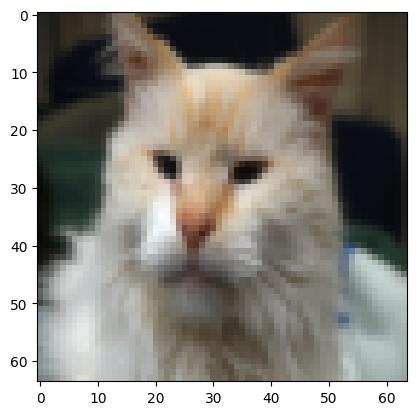

In [5]:
# Example of a picture
index = 27
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [6]:
np.squeeze(train_set_y[:, index]).shape

()

In [7]:
np.squeeze(train_set_y[:, index])

array(1)

In [8]:
classes[np.squeeze(train_set_y[:, index])].decode("utf-8")

'cat'

In [9]:
classes[np.squeeze(train_set_y[:, index])]

np.bytes_(b'cat')

In [10]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)


array([[[19, 22,  2],
        [23, 26,  2],
        [27, 29,  2],
        ...,
        [99, 87, 33],
        [88, 77, 26],
        [96, 85, 36]],

       [[ 7, 12,  2],
        [ 8, 12,  2],
        [10, 13,  2],
        ...,
        [73, 66, 14],
        [74, 66, 15],
        [90, 77, 32]],

       [[ 6,  9,  2],
        [ 6,  9,  2],
        [ 6,  9,  1],
        ...,
        [70, 65, 12],
        [69, 64, 13],
        [96, 84, 40]],

       ...,

       [[23, 21,  8],
        [18, 17,  6],
        [ 8,  8,  3],
        ...,
        [45, 37, 15],
        [22, 20,  7],
        [ 9, 10,  4]],

       [[23, 21,  8],
        [15, 13,  5],
        [ 8,  7,  3],
        ...,
        [36, 30, 12],
        [12, 12,  5],
        [ 6,  8,  3]],

       [[24, 24, 10],
        [13, 12,  4],
        [ 7,  6,  2],
        ...,
        [22, 20,  8],
        [ 9, 10,  4],
        [ 7,  8,  4]]], dtype=uint8)
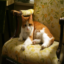

In [11]:
train_set_x_orig[7]

In [12]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [13]:
import sklearn.datasets
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_file',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard

In [14]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [15]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
train_set_x[:1]

array([[0.06666667, 0.76862745, 0.32156863, 0.00392157, 0.03529412,
        0.32941176, 0.21960784, 0.0745098 , 0.24705882, 0.09019608,
        0.7372549 , 0.01568627, 0.60392157, 0.06666667, 0.28235294,
        0.96078431, 0.99215686, 0.85098039, 0.54901961, 0.00784314,
        0.01960784, 0.06666667, 0.64313725, 0.61176471, 0.47843137,
        0.05882353, 0.30588235, 0.14117647, 0.05490196, 0.70588235,
        0.15294118, 0.74509804, 0.91372549, 0.50588235, 0.5372549 ,
        0.10196078, 0.09019608, 0.36862745, 0.24705882, 0.44313725,
        0.46666667, 0.00392157, 0.24705882, 1.        , 0.23921569,
        0.        , 0.25098039, 0.2       , 0.08235294, 0.22352941,
        0.64313725, 0.59607843, 0.41568627, 0.15686275, 0.05882353,
        1.        , 0.12156863, 0.55294118, 0.20392157, 0.29411765,
        0.31764706, 0.49019608, 0.38823529, 0.36862745, 0.00784314,
        0.3372549 , 0.88627451, 0.29803922, 0.54509804, 0.16862745,
        0.09411765, 0.02745098, 0.05098039, 0.40

In [16]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+ np.exp(-z))
    ### END CODE HERE ###

    return s

In [17]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [18]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [19]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [20]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X))                                   # compute activation
    cost =  -np.sum((Y*np.log(A)+ (1-Y)*np.log(1-A)))/m                              # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1.0/m)*np.dot(X, (A-Y).T)
    db = (1.0/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [21]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99946242]
 [2.39837681]]
db = -0.00011518990122287112
cost = 5.800522643792071


In [22]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False, lambd = 0):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    lambd -- L2 regularization parameter

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Add L2 regularization to cost and gradients
        cost = cost + (lambd/(2*X.shape[1]))*np.sum(np.square(w))
        grads["dw"] = grads["dw"] + (lambd/X.shape[1])*w


        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w-learning_rate*dw
        b = b-learning_rate*db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [23]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.18858655]
 [0.07705788]]
b = 2.018609450740716
dw = [[0.52701478]
 [1.17122641]]
db = -0.10926666832863603


In [24]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [25]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [26]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.5, print_cost = False, lambd = 0):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    lambd -- L2 regularization parameter

    Returns:
    d -- dictionary containing information about the model.
    """

    ### START CODE HERE ###

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, lambd)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [27]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.005, print_cost = True, lambd = 0.01)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584243
Cost after iteration 200: 0.466662
Cost after iteration 300: 0.375836
Cost after iteration 400: 0.331520
Cost after iteration 500: 0.303325
Cost after iteration 600: 0.279929
Cost after iteration 700: 0.260091
Cost after iteration 800: 0.242991
Cost after iteration 900: 0.228058
Cost after iteration 1000: 0.214877
Cost after iteration 1100: 0.203140
Cost after iteration 1200: 0.192611
Cost after iteration 1300: 0.183106
Cost after iteration 1400: 0.174477
Cost after iteration 1500: 0.166606
Cost after iteration 1600: 0.159395
Cost after iteration 1700: 0.152764
Cost after iteration 1800: 0.146645
Cost after iteration 1900: 0.140981
Cost after iteration 2000: 0.135723
Cost after iteration 2100: 0.130830
Cost after iteration 2200: 0.126264
Cost after iteration 2300: 0.121995
Cost after iteration 2400: 0.117994
Cost after iteration 2500: 0.114238
Cost after iteration 2600: 0.110705
Cost after iteration 2700: 0.107376
Cost

y = 1, you predicted that it is a "cat" picture.


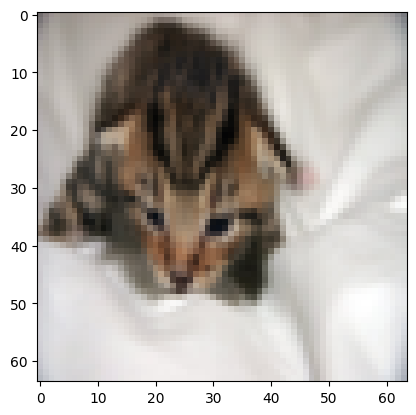

In [28]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0][index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0][index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

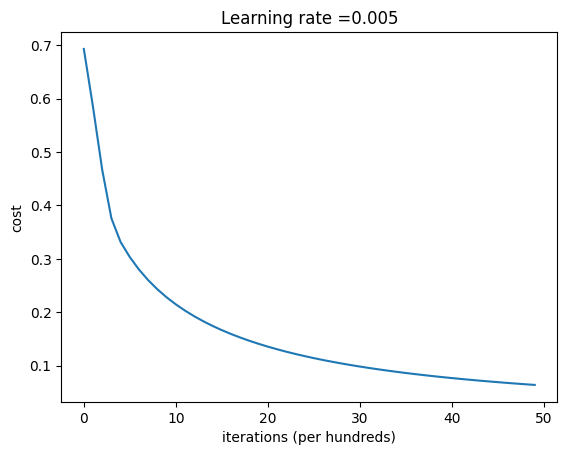

In [29]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()